In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
Data = pd.read_excel('usd.xls')
Date = Data['Date'].values
USD = Data['USD'].values


In [86]:
N = len(USD)
t = (N+1)//4
n = N - t
r = 25


In [87]:
X_matrix = np.array([USD[i:N - t + i] for i in range(t)])

In [88]:
C_matrix = (1/n)*X_matrix.dot(X_matrix.transpose())


In [89]:
U, V = np.linalg.eig(C_matrix)
Y = V.transpose().dot(X_matrix)


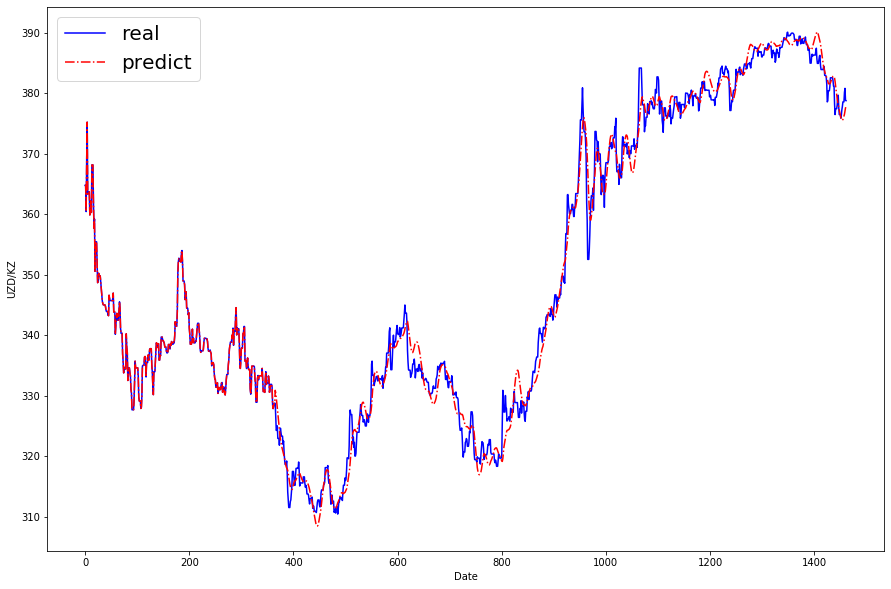

In [95]:
Vt = V[-1,:r]
Q = X_matrix[-t+1:]
V_ = V[:t-1, :r]

predict = ((Vt @ V_.transpose()).dot(Q))/(1 - Vt @ Vt.transpose())
predict = np.append(USD[:N-n], predict)

plt.figure(figsize=(15, 10))
plt.plot(USD, 'b',linestyle = '-', label='real')
plt.plot(predict, 'r',linestyle = '-.', label='predict')
plt.legend(fontsize = 20)
plt.xlabel('Date')
plt.ylabel('UZD/KZ')
plt.show()
